# Final Project

**Due date: Saturday, December 9th**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [1]:
library('tidyverse')
library('gridExtra')
library('dplyr')
library('knitr')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
all_tornados <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-05-16/tornados.csv')

Rows: 68693 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (2): tz, st
dbl  (21): om, yr, mo, dy, stf, mag, inj, fat, loss, slat, slon, elat, elon,...
lgl   (1): fc
dttm  (1): datetime_utc
date  (1): date
time  (1): time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
all_tornados |> head()

om,yr,mo,dy,date,time,tz,datetime_utc,st,stf,⋯,elon,len,wid,ns,sn,f1,f2,f3,f4,fc
<dbl>,<dbl>,<dbl>,<dbl>,<date>,<time>,<chr>,<dttm>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
192,1950,10,1,1950-10-01,21:00:00,America/Chicago,1950-10-02 03:00:00,OK,40,⋯,-102.30,15.8,10,1,1,25,0,0,0,FALSE
193,1950,10,9,1950-10-09,02:15:00,America/Chicago,1950-10-09 08:15:00,NC,37,⋯,0.00,2.0,880,1,1,47,0,0,0,FALSE
195,1950,11,20,1950-11-20,02:20:00,America/Chicago,1950-11-20 08:20:00,KY,21,⋯,0.00,0.1,10,1,1,177,0,0,0,FALSE
196,1950,11,20,1950-11-20,04:00:00,America/Chicago,1950-11-20 10:00:00,KY,21,⋯,0.00,0.1,10,1,1,209,0,0,0,FALSE
197,1950,11,20,1950-11-20,07:30:00,America/Chicago,1950-11-20 13:30:00,MS,28,⋯,0.00,2.0,37,1,1,101,0,0,0,FALSE
194,1950,11,4,1950-11-04,17:00:00,America/Chicago,1950-11-04 23:00:00,PA,42,⋯,-75.93,15.9,100,1,1,71,11,0,0,FALSE


In [4]:
# too much info in original data set that I didn't fully understand/didn't want to use
# selecting the columns I wanted here
tornados = all_tornados %>% 
    select(om, yr, mo, date, time, tz, datetime_utc, st, mag,
          inj, fat, loss, len, wid, ns, fc)
head(tornados)

om,yr,mo,date,time,tz,datetime_utc,st,mag,inj,fat,loss,len,wid,ns,fc
<dbl>,<dbl>,<dbl>,<date>,<time>,<chr>,<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
192,1950,10,1950-10-01,21:00:00,America/Chicago,1950-10-02 03:00:00,OK,1,0,0,5e+04,15.8,10,1,FALSE
193,1950,10,1950-10-09,02:15:00,America/Chicago,1950-10-09 08:15:00,NC,3,3,0,5e+05,2.0,880,1,FALSE
195,1950,11,1950-11-20,02:20:00,America/Chicago,1950-11-20 08:20:00,KY,2,0,0,5e+05,0.1,10,1,FALSE
196,1950,11,1950-11-20,04:00:00,America/Chicago,1950-11-20 10:00:00,KY,1,0,0,5e+05,0.1,10,1,FALSE
197,1950,11,1950-11-20,07:30:00,America/Chicago,1950-11-20 13:30:00,MS,1,3,0,5e+04,2.0,37,1,FALSE
194,1950,11,1950-11-04,17:00:00,America/Chicago,1950-11-04 23:00:00,PA,3,1,0,5e+05,15.9,100,1,FALSE


In [5]:
st_col = tornados |> pull(st)

In [6]:
st_col %>% table
# to see where I want the chart's cutoff to be for an "other" column & what kind of numbers I'm working with

.
  AK   AL   AR   AZ   CA   CO   CT   DC   DE   FL   GA   HI   IA   ID   IL   IN 
   4 2456 1952  279  466 2337  121    3   69 3566 1843   41 2815  219 2716 1556 
  KS   KY   LA   MA   MD   ME   MI   MN   MO   MS   MT   NC   ND   NE   NH   NJ 
4429 1099 2271  177  395  134 1075 2094 2441 2594  434 1450 1633 2993   96  172 
  NM   NV   NY   OH   OK   OR   PA   PR   RI   SC   SD   TN   TX   UT   VA   VI 
 636   94  483 1223 4144  125  909   29   13 1141 1898 1335 9265  135  803    1 
  VT   WA   WI   WV   WY 
  48  127 1495  146  713 

In [7]:
st_col |> fct_lump(n=20) |> fct_infreq() |> fct_relevel('Other', after = Inf) |> levels()

[1] "TX"    "KS"    "OK"    "FL"    "NE"    "IA"    "IL"    "MS"    "AL"   
[10] "MO"    "CO"    "LA"    "MN"    "AR"    "SD"    "GA"    "ND"    "IN"   
[19] "WI"    "NC"    "Other"

In [8]:
state_lumped = tornados %>%
    mutate(st_lumped = st %>% fct_lump(n=25)%>% fct_infreq() %>% fct_relevel('Other', after = Inf))

In [9]:
options(repr.plot.height = 8, repr.plot.width = 10)

p1 = ggplot(state_lumped, aes(st_lumped)) + 
    geom_bar(fill='darkseagreen') + 
    labs(title = "Top 25 State Tornado Counts from 1950 to 2022", 
        x = "State",
        y = "Tornado Count") +
    theme(
        plot.title = element_text(hjust = 0.5, size = 16),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        axis.text.x = element_text(angle = 30, size = 10, hjust = 1))

In [10]:
options(repr.plot.height = 8, repr.plot.width = 10)

year_counts = tornados %>%
    group_by(yr) %>%
    summarize(total_tornados = n())
    

p2 = ggplot(year_counts, aes(x = as.factor(yr), y = total_tornados)) + 
    geom_bar(stat = "identity", fill='darkseagreen') +
    labs(title = "Yearly Tornado Counts from 1950 to 2022", 
        x = "Year",
        y = "Tornado Count") +
    theme(
        plot.title = element_text(hjust = 0.5, size = 16),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        axis.text.x = element_text(angle = 30, size = 10, hjust = 1)) +
    scale_x_discrete(breaks = as.factor(seq(1950, 2022, by = 2)))

In [11]:
options(repr.plot.height = 8, repr.plot.width = 10)

year_averages = tornados %>%
    group_by(st, yr) %>%
    summarize(avg_tornado_cnt = n()/(2022-1950))

p3 = ggplot(year_averages, aes(x = as.factor(st), y = avg_tornado_cnt, fill = state)) + 
    geom_bar(stat = "identity", fill='darkseagreen') + 
    labs(title = "Average Number of Tornados per Year Since 1950",
         x = "State",
         y = "Tornado Count") + 
    theme(
        plot.title = element_text(hjust = 0.5, size = 16),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        axis.text.x = element_text(angle = 60, size = 10, hjust = 1))

`summarise()` has grouped output by 'st'. You can override using the `.groups`
argument.


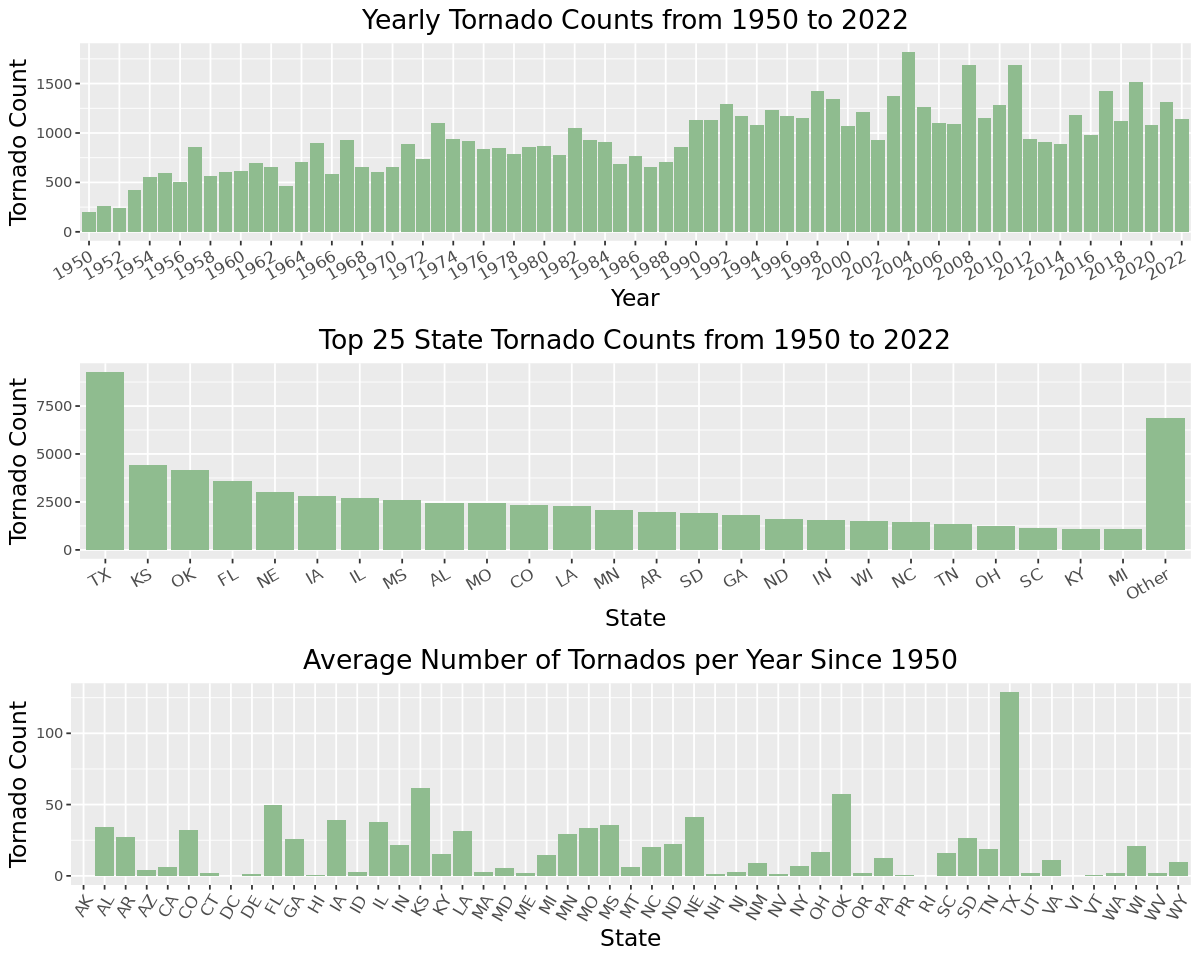

In [12]:
plot1 <- p1
plot2 <- p2
plot3 <- p3
grid.arrange(plot2, plot1, plot3, nrow = 3)

I wanted to explore tornados in the US, and this data set gave a lot of good information.
 The first display is a distribution of tornadoes throughout the years of the dataset. It can be shown that the count of tornadoes seem to have steadily increased since 1950, but whether this increase is because of increased storm documentation or whether it is from more actual storms cannot be drawn from the data. This would be interesting to further investigated. The year where there were the most tornadoes in the US is 2004. Next, I wanted to display general information about tornado frequencies by state and year. This distribution shows that Texas has had the highest number of tornadoes between the years of 1950 and 2022 at over 9000 tornadoes. This is roughly 4800 more than the next state, Kansas. North Carolina sneaks into the top 20 at 1450 total tornadoes. The major pattern is that states unsually in the center of the country, also called Tornado Alley, are the states with more tornadoes. In future research, it should be researched the number of tornadoes per square mile (of each state). Texas is geographically huge, and whether it has proportionally more tornadoes versus just having more space to have tornadoes should be investigated. Lastly in this figure, there is an alphabetically distributed average number of tornadoes per year for each state. Like the total count, Texas has the highest average number of tornadoes each year at over 150 tornadoes.


In [13]:
# want to do a code that analyzes the relationship between the mag and length and width of a tornado
# and the number of deaths and injuries and economic loss

Warning message:
“Removed 756 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 756 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 27176 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 27170 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 27170 rows containing missing values (`geom_point()`).”


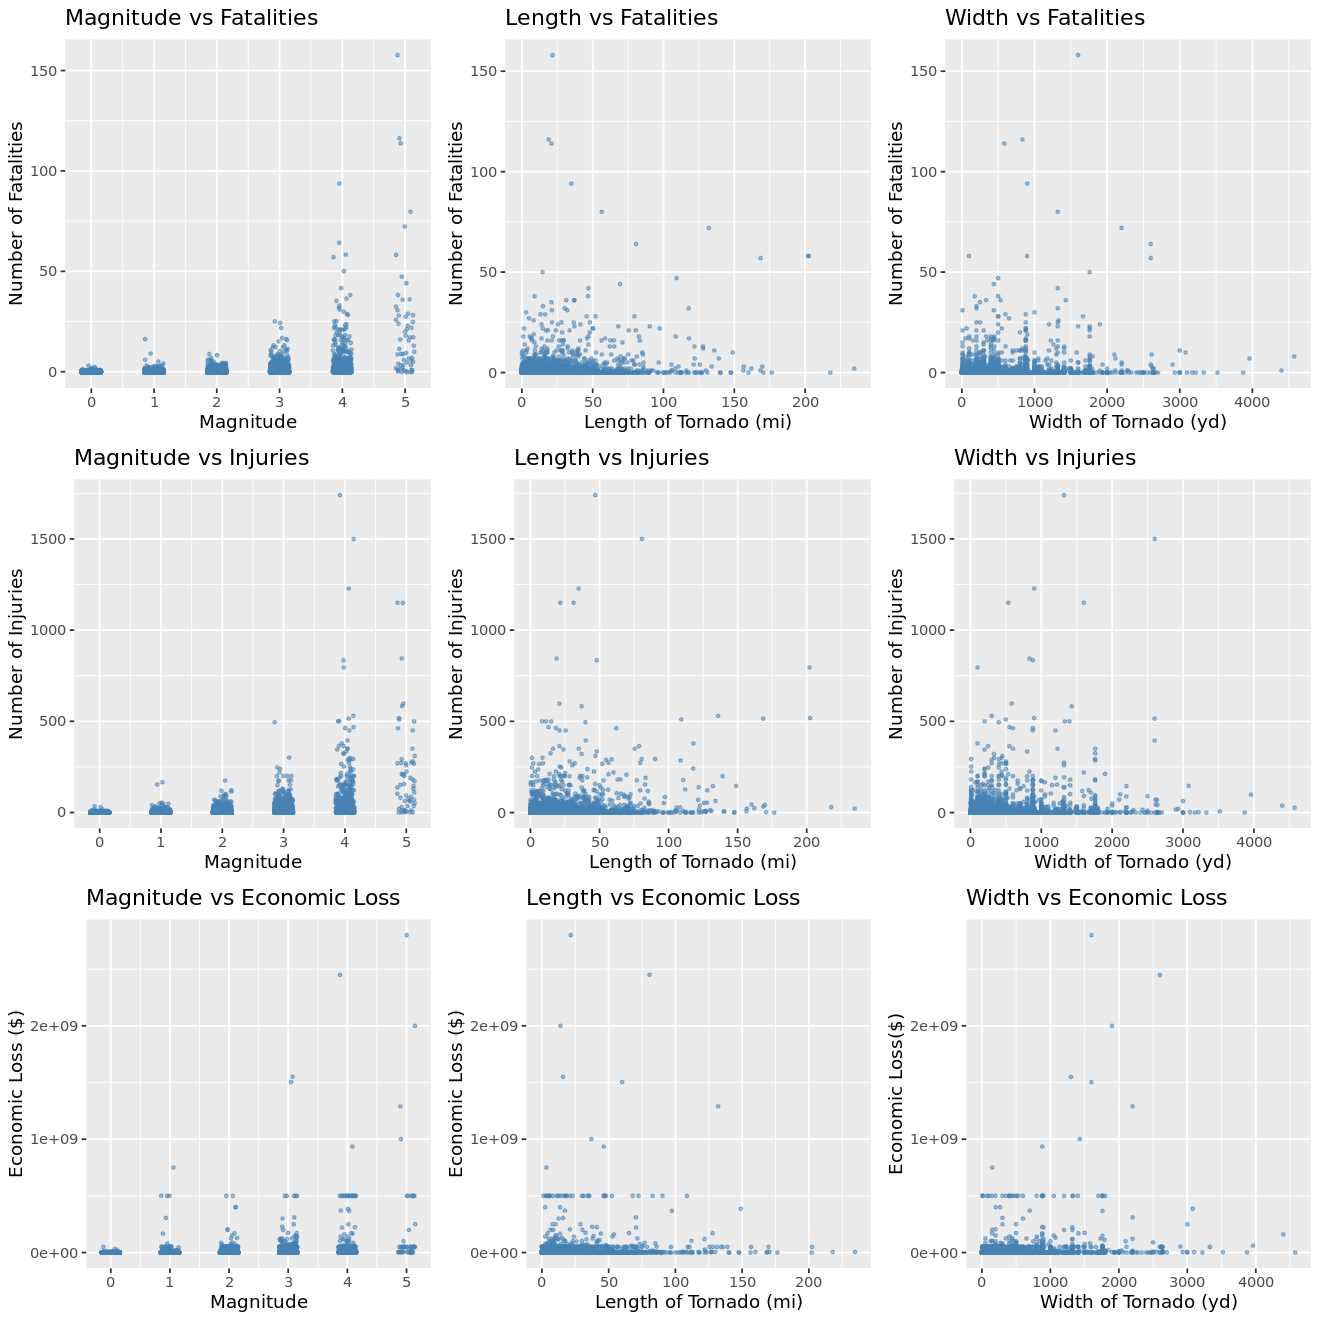

In [14]:
p4 = ggplot(tornados, aes(x = mag, y = fat)) +
    geom_point(size = 0.7, alpha = 0.5, color = 'steelblue', position = position_jitter(width = 0.15)) +
    labs(title = "Magnitude vs Fatalities", 
        x = "Magnitude",
        y = "Number of Fatalities")
p5 = ggplot(tornados, aes(x = len, y = fat)) +
    geom_point(size = 0.7, alpha = 0.5, color = 'steelblue') +
    labs(title = "Length vs Fatalities", 
        x = "Length of Tornado (mi)",
        y = "Number of Fatalities")
p6 = ggplot(tornados, aes(x = wid, y = fat)) +
    geom_point(size = 0.7, alpha = 0.5, color = 'steelblue') +
    labs(title = "Width vs Fatalities", 
        x = "Width of Tornado (yd)",
        y = "Number of Fatalities")
p7 = ggplot(tornados, aes(x = mag, y = inj)) +
    geom_point(size = 0.7, alpha = 0.5, color = 'steelblue', position = position_jitter(width = 0.15)) +
    labs(title = "Magnitude vs Injuries", 
        x = "Magnitude",
        y = "Number of Injuries")
p8 = ggplot(tornados, aes(x = len, y = inj)) +
    geom_point(size = 0.7, alpha = 0.5, color = 'steelblue') +
    labs(title = "Length vs Injuries", 
        x = "Length of Tornado (mi)",
        y = "Number of Injuries")
p9 = ggplot(tornados, aes(x = wid, y = inj)) +
    geom_point(size = 0.7, alpha = 0.5, color = 'steelblue') +
    labs(title = "Width vs Injuries", 
        x = "Width of Tornado (yd)",
        y = "Number of Injuries")
p10 = ggplot(tornados, aes(x = mag, y = loss)) +
    geom_point(size = 0.7, alpha = 0.5, color = 'steelblue', position = position_jitter(width = 0.15)) +
    labs(title = "Magnitude vs Economic Loss", 
        x = "Magnitude",
        y = "Economic Loss ($)")
p11 = ggplot(tornados, aes(x = len, y = loss)) +
    geom_point(size = 0.7, alpha = 0.5, color = 'steelblue') +
    labs(title = "Length vs Economic Loss", 
        x = "Length of Tornado (mi)",
        y = "Economic Loss ($)")
p12 = ggplot(tornados, aes(x = wid, y = loss)) +
    geom_point(size = 0.7, alpha = 0.5, color = 'steelblue') +
    labs(title = "Width vs Economic Loss", 
        x = "Width of Tornado (yd)",
        y = "Economic Loss($)")

options(repr.plot.height = 11, repr.plot.width = 11)
grid.arrange(p4, p5, p6, p7, p8, p9, p10, p11, p12, nrow=3)

Next, I wanted to investigate the trends of the negative costs of tornadoes in the US. This was done through analyzing each tornado's magnitude, it's length (in miles), and it's width (in yards). Each of these tornado qualities were matched with number of fatalities, number of injuries, and estimated economic cost. A magnitude of 5 seemed to have a less condensed spread of fatalities, injuried, and economic cost. It is also shown that there are fewer magnitude 5 tornadoes documented than any other magnitude, and the total cost (human and economic) is greater on average. Length and width of tornadoes follow similar patterns to each other with no real distinction as to whether greater length and width result in higher fatalities and injuries. There is a pattern in the economic loss that must be noted. Across all of magnitude, length, and width of tornado, there is a line at half of 1e+09, or half a billion USD in cost. This may indicate that half a billion dollars is a number often defaulted to when analyzing cost of a tornado.

In [15]:
#wanting to merge two 
states = c("NC", "TX", "MT", "FL", "MA", "IN", "NV", "LA")
selected = tornados %>%
    filter(st %in% states)

In [17]:
state_summary1 = selected %>%
    group_by(st) %>%
    summarize(total_cnt = n(),
              cnt_since_2000 = length(which(yr >= 2000)),
              pct_since_2000 = cnt_since_2000 / total_cnt,
              pct_mag4 = length(which(mag == 4)) / total_cnt,
             .groups = 'drop')
state_summary1

st,total_cnt,cnt_since_2000,pct_since_2000,pct_mag4
<chr>,<int>,<int>,<dbl>,<dbl>
FL,3566,1112,0.3118340,0.0005608525
IN,1556,590,0.3791774,0.0167095116
LA,2271,1015,0.4469397,0.0039630119
MA,177,41,0.2316384,0.0112994350
MT,434,131,0.3018433,0.0023041475
NC,1450,679,0.4682759,0.0048275862
NV,94,33,0.3510638,0.0000000000
TX,9265,2936,0.3168915,0.0055045872


In [18]:
#creating a second data set to merge and merge into a final table
state_summary2 = selected %>%
    group_by(st) %>%
    summarize(
        max_fat = max(fat),
        avg_width = mean(wid),
        avg_length = mean(len)
    )

final = merge(state_summary1, state_summary2, by = "st") %>%
    rename(State = st) %>%
    arrange(total_cnt) %>%
    kable(format = "markdown")
print(final)



|State | total_cnt| cnt_since_2000| pct_since_2000|  pct_mag4| max_fat| avg_width| avg_length|
|:-----|---------:|--------------:|--------------:|---------:|-------:|---------:|----------:|
|NV    |        94|             33|      0.3510638| 0.0000000|       0|  38.11702|  0.9258511|
|MA    |       177|             41|      0.2316384| 0.0112994|      94|  89.76271|  2.6107345|
|MT    |       434|            131|      0.3018433| 0.0023041|       2|  51.65207|  2.0105069|
|NC    |      1450|            679|      0.4682759| 0.0048276|      16|  92.19931|  3.3531517|
|IN    |      1556|            590|      0.3791774| 0.0167095|      36| 102.16003|  3.7628021|
|LA    |      2271|           1015|      0.4469397| 0.0039630|      47| 119.73316|  4.0155526|
|FL    |      3566|           1112|      0.3118340| 0.0005609|      25|  47.34268|  1.8564386|
|TX    |      9265|           2936|      0.3168915| 0.0055046|     114|  94.36125|  2.4772434|


Lastly, I wanted to select states from around the country to analyze some statistics for easy comparison. The states chosen were Nevada, Massachusetts, Montana, North Carolina, Indiana, Louisiana, Florida, and Texas. The table above shows total tornado count from 1950-2022, the total tornado count since 2000, the percent of each state's tornados since 2000, the percent of magnitude 4 tornadoes, maximum fatatities from a tornado, and the average length and width from each torndao in the state. Nevada had the least amount of tornadoes, no tornado deaths, and the smallest average width and length of tornadoes. North Carolina is seeing an increase in tornado frequency as over the 72 years studied, almost 50% have been in the past 22 years. Massachusetts has not had many tornadoes, but their tornadoes seem to be relatively high in fatalities, width, and length. It can be seen that Louisiana has the largest tornadoes, and why this is true should be further studied to have better tornado preparedness. Overall, tornadoes in the US can be very deadly, but the chance that a tornado is of magnitude 4 is pretty low. Some states should have more methods of reacting and preparing for tornadoes as they are more effected, and these states and total costs of tornadoes have been evaluated in this analysis.
